Cleaned data has been saved to 'cleaned_sales_data.csv'.
        ordernumber  quantityordered    priceeach  orderlinenumber  \
count   2823.000000      2823.000000  2823.000000      2823.000000   
mean   10258.725115        35.092809    83.658544         6.466171   
std       92.085478         9.741443    20.174277         4.225841   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10180.000000        27.000000    68.860000         3.000000   
50%    10262.000000        35.000000    95.700000         6.000000   
75%    10333.500000        43.000000   100.000000         9.000000   
max    10425.000000        97.000000   100.000000        18.000000   

              sales       qtr_id     month_id     year_id         msrp  
count   2823.000000  2823.000000  2823.000000  2823.00000  2823.000000  
mean    3553.889072     2.717676     7.092455  2003.81509   100.715551  
std     1841.865106     1.203878     3.656633     0.69967    40.187912  
min      482.130000 

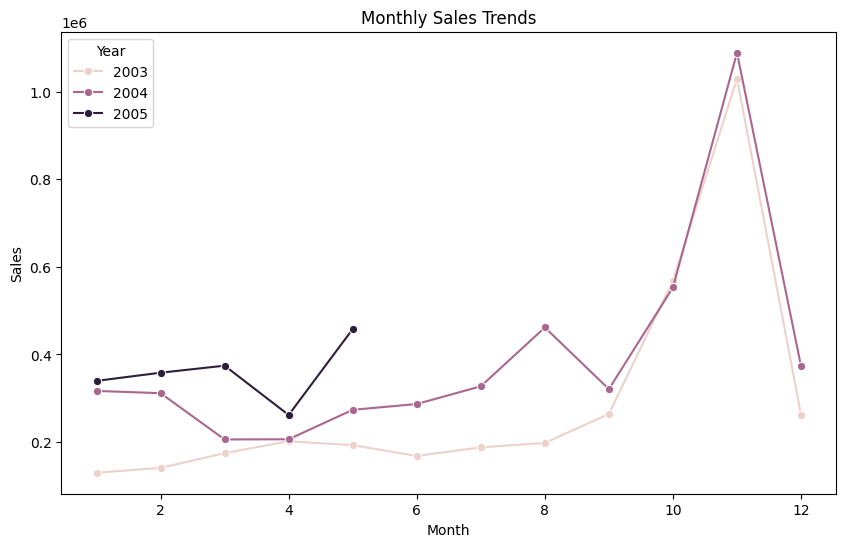

Top Customers:
 customername
Euro Shopping Channel           912294.11
Mini Gifts Distributors Ltd.    654858.06
Australian Collectors, Co.      200995.41
Muscle Machine Inc              197736.94
La Rochelle Gifts               180124.90
Dragon Souveniers, Ltd.         172989.68
Land of Toys Inc.               164069.44
The Sharp Gifts Warehouse       160010.27
AV Stores, Co.                  157807.81
Anna's Decorations, Ltd         153996.13
Name: sales, dtype: float64


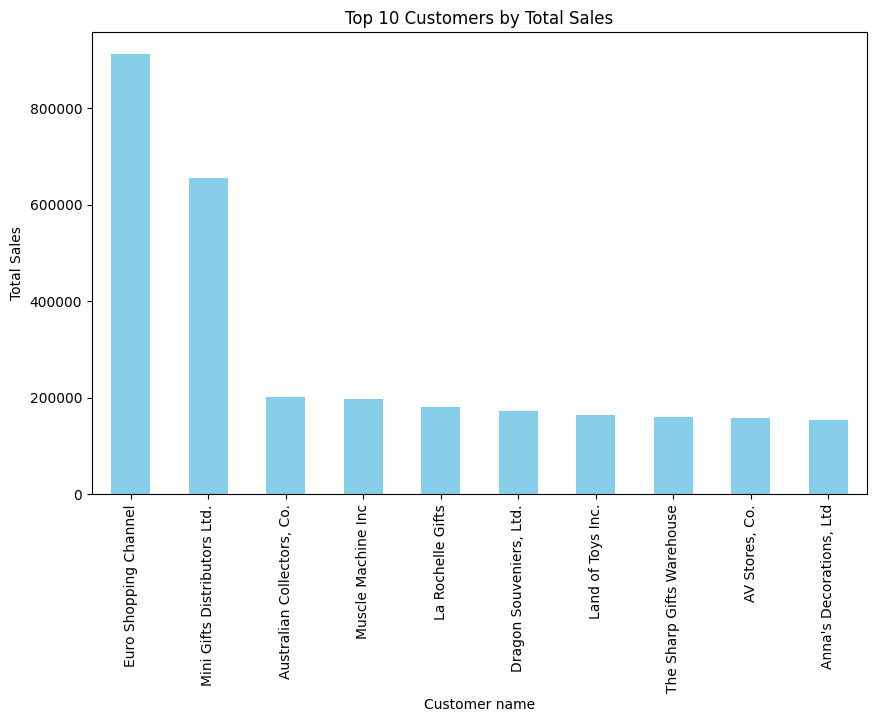

Top Products:
 productcode
S18_3232    288245.42
S10_1949    191073.03
S10_4698    170401.07
S12_1108    168585.32
S18_2238    154623.95
S12_3891    145332.04
S24_3856    140626.90
S12_2823    140006.16
S18_1662    139421.97
S12_1099    137177.01
Name: sales, dtype: float64


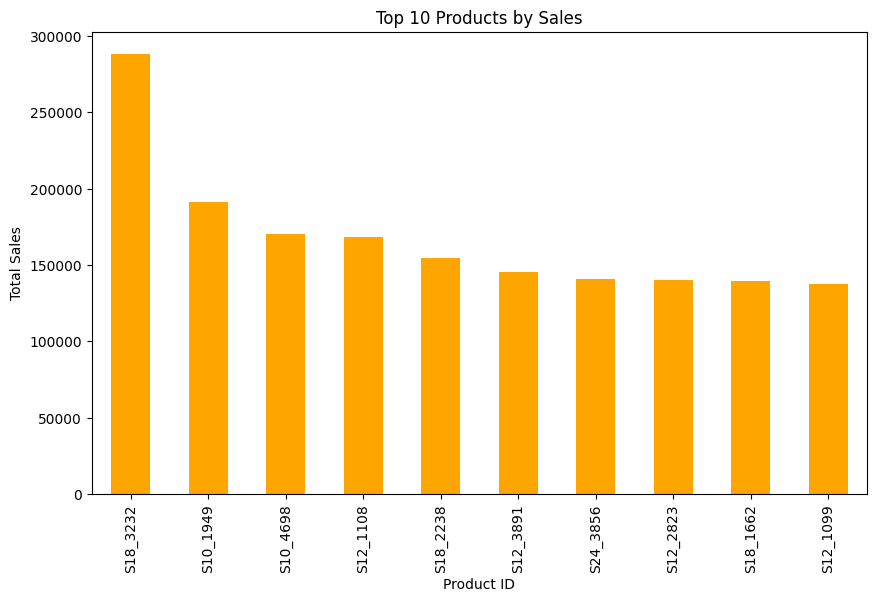

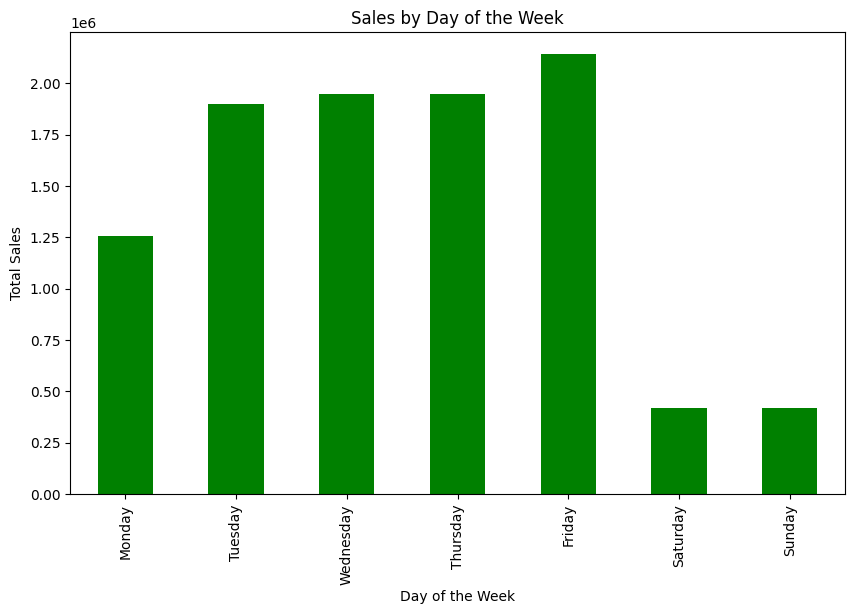

Sales by Region:
 city
Madrid         1082551.44
San Rafael      654858.06
NYC             560787.77
Singapore       288488.41
Paris           268944.68
                  ...    
Brisbane         50218.51
Los Angeles      48048.46
Burbank          46084.64
Munich           34993.92
Charleroi        33440.10
Name: sales, Length: 73, dtype: float64


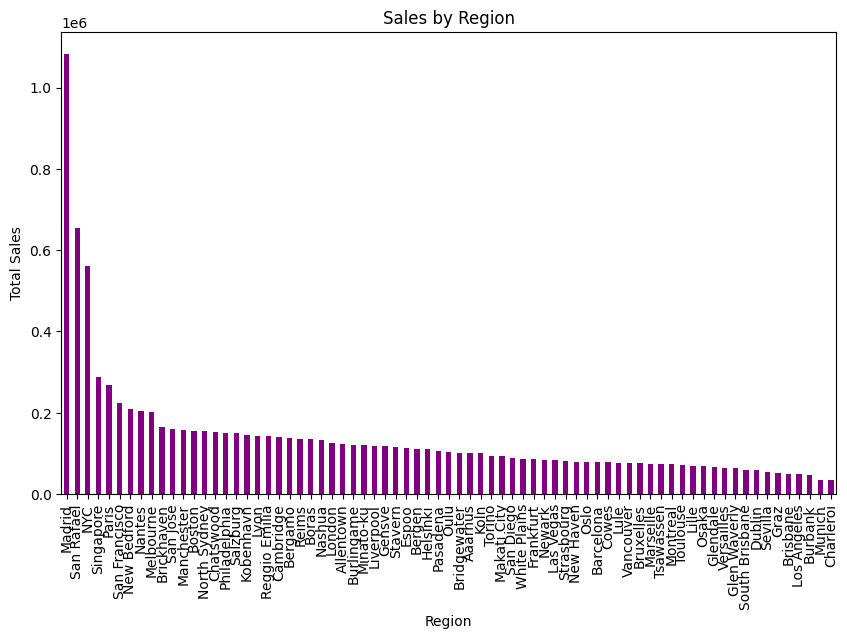

                         recency  ordernumber   monetary
customername                                            
AV Stores, Co.               195            3  157807.81
Alpha Cognac                  64            3   70488.44
Amica Models & Co.           264            2   94117.26
Anna's Decorations, Ltd       83            4  153996.13
Atelier graphique            187            3   24179.96


In [17]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading data  and check proper accessing
file_path = "sample_sales_data.csv" 
sales_data = pd.read_csv(file_path, encoding='latin1')  # Common encoding

# print(sales_data.info())
# print(sales_data.head())

# missing valuse check and handling
missing_values = sales_data.isnull().sum()
# print("Missing Values:\n", missing_values)
sales_data.fillna(0, inplace=True)  

# data cleaniing
sales_data.columns = sales_data.columns.str.strip().str.lower().str.replace(' ', '_')

# Save the cleaned DataFrame to a CSV file
sales_data.to_csv('cleaned_sales_data.csv', index=False)

print("Cleaned data has been saved to 'cleaned_sales_data.csv'.")

# performing eda

# 1.Generate summary statistics
print(sales_data.describe())

sales_data.rename(columns={'orderdate': 'date'}, inplace=True)
print(sales_data.columns)

# 2.Analyze trends(monthly sales)
sales_data['date'] = pd.to_datetime(sales_data['date'])  

sales_data['year'] = sales_data['date'].dt.year
sales_data['month'] = sales_data['date'].dt.month

monthly_sales = sales_data.groupby(['year', 'month'])['sales'].sum().reset_index()
print(monthly_sales)

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='month', y='sales', hue='year', marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Year')
plt.show()

# 3.identifying top customer

top_customers = sales_data.groupby('customername')['sales'].sum().sort_values(ascending=False).head(10)
print("Top Customers:\n", top_customers)

plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='skyblue')
plt.title('Top 10 Customers by Total Sales')
plt.xlabel('Customer name')
plt.ylabel('Total Sales')
plt.show()

# 4.product wise analysis

product_sales = sales_data.groupby('productcode')['sales'].sum().sort_values(ascending=False).head(10)
print("Top Products:\n", product_sales)

plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar', color='orange')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.show()

# 5. demanding period

sales_data['day_of_week'] = sales_data['date'].dt.day_name()

weekly_sales = sales_data.groupby('day_of_week')['sales'].sum()

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_sales = weekly_sales.reindex(ordered_days)

plt.figure(figsize=(10, 6))
weekly_sales.plot(kind='bar', color='green')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()

# 6. Regional sales analysis

region_sales = sales_data.groupby('city')['sales'].sum().sort_values(ascending=False)
print("Sales by Region:\n", region_sales)

plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', color='purple')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

# 7.customer segmentation analysis using RFM analysis(RFM Analysis: Recency, Frequency, Monetary)
reference_date = sales_data['date'].max()  
rfm_data = sales_data.groupby('customername').agg({
    'date': lambda x: (reference_date - x.max()).days,  
    'ordernumber': 'nunique', 
    'sales': 'sum'  
}).rename(columns={'date': 'recency', 'order_id': 'frequency', 'sales': 'monetary'})

print(rfm_data.head())


# Export insights to a CSV file
rfm_data.to_csv('rfm_analysis.csv', index=True)





In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load dataset
data = pd.read_csv('sample_sales_data.csv')
sales_data.rename(columns={'orderdate': 'date'}, inplace=True)
print(sales_data.columns)

# Aggregate data (e.g., sales per month)
data['date'] = pd.to_datetime(data['date'])
monthly_sales = data.groupby(data['date'].dt.to_period('M')).sum().reset_index()

# Feature engineering
monthly_sales['year'] = monthly_sales['date'].dt.year
monthly_sales['month'] = monthly_sales['date'].dt.month

# Define features and target
X = monthly_sales[['year', 'month']]
y = monthly_sales['sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 5327: invalid start byte

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
df=pd.read_csv("/content/cleaned_sales_data.csv",parse_dates=["orderdate"],index_col="orderdate")

df.head()
df.isnull().sum()

# Resample to monthly data and take the mean for each month
df_monthly = df['sales'].resample('ME').mean()
plt.figure(figsize=(15, 6))
plt.plot(df_monthly, label='Monthly Sales Data')
plt.title('Monthly Average Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.show()

#normalize sales data
#normalize sales data
scaler = MinMaxScaler(feature_range=(0, 1))  # Pass (0, 1) directly as the argument
df_scaled = scaler.fit_transform(np.array(df['sales']).reshape(-1, 1))

# ... (rest of the code remains the same)
def create_sequence(data,sequence_length):
  X,y=[],[]
  for i in range(len(data)-sequence_length):
    X.append(data[i:i+sequence_length])
    y.append(data[i+sequence_length])
  return np.array(X),np.array(y)
SEQUENCE_LENGTH=60
X,y=create_sequence(df_scaled,SEQUENCE_LENGTH)
train_size=int(len(X)*0.8)
X_train,X_test=X[:train_size],X[train_size:]
y_train,y_test=y[:train_size],y[train_size:]

#build the lstm model
model=Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(64, return_sequences=True),
    LSTM(32, return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

history=model.fit(X_train,y_train,epochs=20,batch_size=32,validation_data=(X_test,y_test))

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

#make prediction
predictions=model.predict(X_test)
predictions=scaler.inverse_transform(predictions)
y_test_actual=scaler.inverse_transform(y_test.reshape(-1,1))
plt.figure(figsize=(10,5))
plt.plot(y_test_actual,label='Actual Sales')
plt.plot(predictions,label='Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

rmse=np.sqrt(mean_squared_error(y_test_actual,predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

"""Segment Customers or Products Using K-Means
Goal: Group products/customers with similar characteristics (e.g., purchase behavior, price ranges).
"""

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Extract the relevant features and create a copy to avoid SettingWithCopyWarning
product_data = df[['sales', 'priceeach']].copy()  # Explicitly create a copy

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(product_data)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
product_data['cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters
plt.scatter(product_data['sales'], product_data['priceeach'], c=product_data['cluster'], cmap='viridis')
plt.xlabel('Sales')
plt.ylabel('Price Each')
plt.title('Product Clusters')
plt.show()

# Reset the index of product_data before assigning the 'cluster' column:
product_data = product_data.reset_index()
df = df.reset_index()  # Reset index of df as well for alignment

# Merge the 'cluster' column into the original DataFrame based on a common column:
df = pd.merge(df, product_data[['orderdate', 'cluster']], on='orderdate', how='left')

# Set the index back to 'orderdate' if desired:
df = df.set_index('orderdate')

"""Recommendation System
Goal: Suggest products to customers based on their purchase history.
2. Collaborative Filtering (Memory-Based Approach)
"""

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

customer_product_matrix = df.pivot_table(index='qtr_id', columns='ordernumber', values='orderlinenumber').fillna(0)
customer_similarity = cosine_similarity(customer_product_matrix)

def recommend_products(qtr_id, top_n=5):
  # Check if qtr_id is in the index
  if qtr_id not in customer_product_matrix.index:
    print(f"qtr_id {qtr_id} not found in customer_product_matrix index.")
    return set()  # Return an empty set if qtr_id is not found

  customer_idx = customer_product_matrix.index.get_loc(qtr_id)
  similarity_scores = customer_similarity[customer_idx]  # Renamed to similarity_scores
  similar_customers_idx = np.argsort(similarity_scores)[::-1][:top_n]
  recommended_products = set()
  for idx in similar_customers_idx:
    # Use np.where to find indices of non-zero elements
    customer_products = np.where(customer_product_matrix.iloc[idx] != 0)[0]
    recommended_products.update(customer_products)
  return recommended_products

# Before calling recommend_products, print the available qtr_ids:
print("Available qtr_ids:", customer_product_matrix.index.unique())

# Call recommend_products with a valid qtr_id from the index
print(recommend_products(qtr_id=customer_product_matrix.index[0], top_n=3))  # Use a valid qtr_id

"""Optimization for Ideal Inventory Levels
4. Use Linear Programming for Inventory Management
Goal: Minimize inventory holding costs while maintaining optimal stock levels to meet demand.
"""

import numpy as np
from scipy.optimize import linprog

# Example demand, ordering, and holding costs (replace with real data)
demand = np.array([100, 150, 200])  # Demand for each product
order_cost = np.array([5, 7, 6])    # Cost per order
holding_cost = np.array([1, 2, 3])  # Cost per unit held in inventory

# Objective function: minimize the total cost (ordering + holding costs)
c = holding_cost + order_cost  # You can adjust the cost components as needed

# Constraints: Assume we want inventory levels to meet or exceed demand
A = np.array([[-1, 0, 0], [0, -1, 0], [0, 0, -1]])  # Constraints for each product (inventory >= demand)
b = -demand  # Demand needs to be met or exceeded

# Bounds for each product (non-negative stock levels)
x0_bounds = (0, None)
x1_bounds = (0, None)
x2_bounds = (0, None)

# Solve the linear programming problem
result = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds, x2_bounds], method='highs')

# Debugging: Check the result
if result.success:
    print("Optimal Inventory Levels:", result.x)
    print("Minimum Cost:", result.fun)
else:
    print("Optimization failed:", result.message)
    print("Solver Status:", result.status)
    print("Solver Output:", result)

import matplotlib.pyplot as plt

# Visualize optimal inventory levels and corresponding costs
products = ['Product 1', 'Product 2', 'Product 3']
optimal_inventory = result.x
costs = optimal_inventory * holding_cost + order_cost

# Plot inventory levels
plt.bar(products, optimal_inventory, color='lightblue', label='Optimal Inventory')
plt.xlabel('Products')
plt.ylabel('Inventory Level')
plt.title('Optimal Inventory Levels for Products')
plt.show()

# Plot costs
plt.bar(products, costs, color='salmon', label='Cost per Product')
plt.xlabel('Products')
plt.ylabel('Cost')
plt.title('Cost of Maintaining Optimal Inventory per Product')
plt.show()

ModuleNotFoundError: No module named 'tensorflow'

In [21]:
python -m ipykernel install --user --name=myenv --display-name "Python (myenv)"


SyntaxError: invalid syntax (107052000.py, line 1)

In [19]:
!pip install ipykernel



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
